In [1]:
# Reference: https://stackoverflow.com/questions/15514593/importerror-no-module-named-when-trying-to-run-python-script/15622021#15622021
import sys
# sys.path.append(r'Z:\\Monte_Carlo4\\Grid_Orientation_002\\LISFLOOD_FP\\Analysis')
# sys.path.append(r'S:\\Grid_Orientation_wse_004_changecalculation_forimageonly_bathy\\LISFLOOD_FP\\Analysis') # good
# sys.path.append(r'S:\\Grid_Orientation_code_008_rmse\\LISFLOOD_FP\\Analysis')
sys.path.append(r'S:\\Grid_Orientation_code_006_machine_C002AU\\LISFLOOD_FP\\Analysis')

In [2]:
import matplotlib.pyplot as plt                             # For plotting
import seaborn as sns                                       # For plotting
import pandas as pd                                         # For reading data
import numpy as np

from comparison import get_datalist, statistic_df_dict, \
                       boxplotting, kdeplotting, comparison_calculation             # For boxplotting and kdeplotting

#### 1. Get data

In [3]:
building_path = fr"S:\\new_versions\data\buildings\lds-nz-building-outlines-all-sources-SHP_002.zip"

------------------------------------------------------------------------------

##### Transformation

In [4]:
trans_list_filename = [
    r"S:\\new_versions_006_forpublication\\vers003",
    r"S:\\new_versions_006_forpublication\\vers004",
    r"S:\\new_versions_006_forpublication\\vers005",
    r"S:\\new_versions_006_forpublication\\vers002",
    r"S:\\new_versions_006_forpublication\\vers001"
]

trans_name = [
    'E translation',
    'N translation',
    'N-E translation',
    'rotation',
    'rotation\n&\nN-E translation'
]

trans_list_resolution = [10]

In [5]:
%%time
trans_datasets = get_datalist(
    trans_list_filename,
    trans_list_resolution,
    building_path,
    0.1
)

trans_comparison = statistic_df_dict(
    trans_name,
    trans_datasets
)

CPU times: total: 2min 33s
Wall time: 3min 7s


##### Resolutions

In [6]:
res_list_filename = [
    r"S:\\new_versions_006_forpublication\\vers007",
    r"S:\\new_versions_006_forpublication\\vers006",
    r"S:\\new_versions_006_forpublication\\vers001",
    r"S:\\new_versions_006_forpublication\\vers008"
]

res_name = [
    '2-meter',
    '5-meter',
    '10-meter',
    '20-meter'
]

res_list_resolution = [2, 5, 10, 20]

In [7]:
%%time
res_datasets = get_datalist(
    res_list_filename,
    res_list_resolution,
    building_path,
    0.1
)

res_comparison = statistic_df_dict(
    res_name,
    res_datasets
)

CPU times: total: 20min 29s
Wall time: 29min 10s


##### Events

In [8]:
events_list_filename = [
    r"S:\\new_versions_006_forpublication\\vers009",
    r"S:\\new_versions_006_forpublication\\vers010",
    r"S:\\new_versions_006_forpublication\\vers011",
    r"S:\\new_versions_006_forpublication\\vers012",
    r"S:\\new_versions_006_forpublication\\vers001",
    r"S:\\new_versions_006_forpublication\\vers013",
]

events_name = [
    '5-year',
    '10-year',
    '20-year',
    '50-year',
    'Jan-2005',
    '1000-year'
]

events_list_resolution = [10]

In [9]:
%%time
events_datasets = get_datalist(
    events_list_filename,
    events_list_resolution,
    building_path,
    0.1
)

events_comparison = statistic_df_dict(
    events_name,
    events_datasets
)

CPU times: total: 3min 23s
Wall time: 4min 2s


-----------------------------------

#### 2. Execution

#### 2.1. Boxplots

In [10]:
import matplotlib
import colorsys
import matplotlib.colors as mc

In [11]:
def lighten_color(color, amount=0.5):
    """
    @Definition:
                A function to lighten the color (by @IanHincks)
    @References:
                https://stackoverflow.com/questions/37765197/darken-or-lighten-a-color-in-matplotlib/49601444#49601444
                https://stackoverflow.com/questions/55656683/change-seaborn-boxplot-line-rainbow-color
    @Arguments:
                color (matplotlib color):
                                A tuple of 3 values of RGB color
                amount (float):
                                Level of brightness of color
    @Returns:
                A new tuple of 3 values of RGB color
    """
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

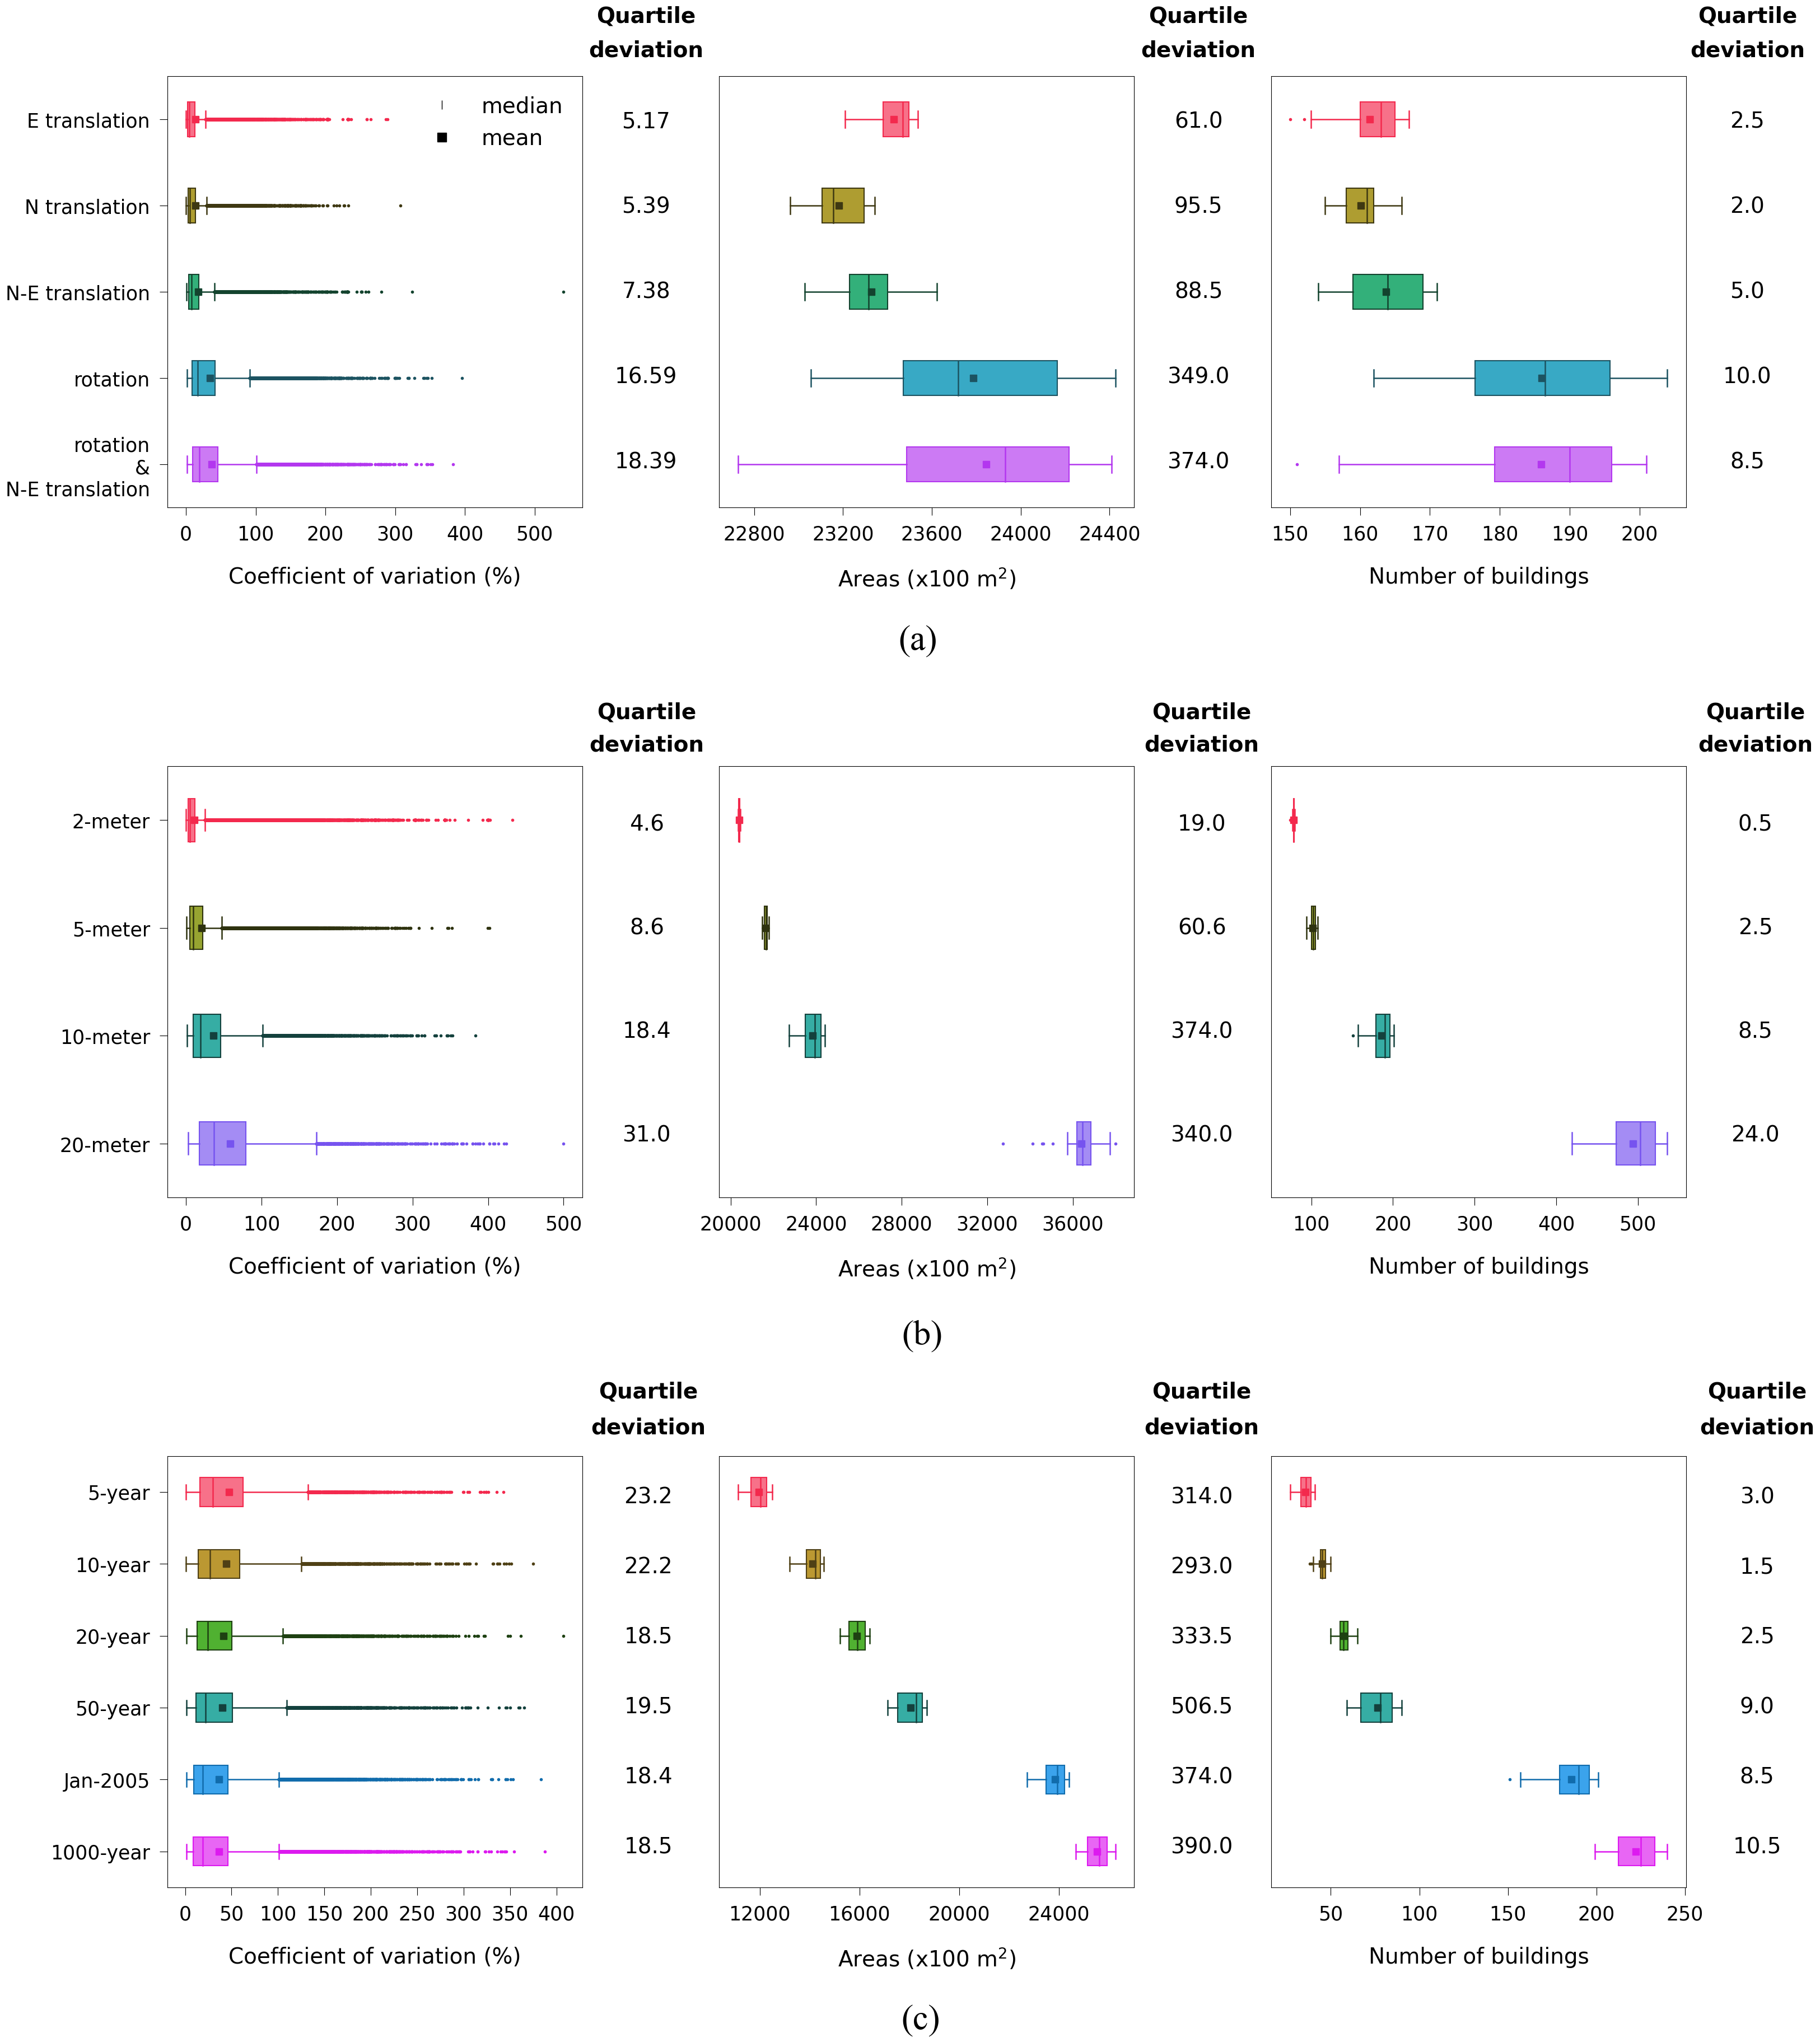

In [12]:
# Set up ax[p]is
fig, ax = plt.subplots(3, 3, figsize=(35, 42))

# Filter -9999
plt.subplots_adjust(wspace=.33, hspace=.6)

x_label = ['Coefficient of variation (%)', 'Areas (x100 $\mathrm{m}^2$)', 'Number of buildings']

data_df_list = [
    [trans_comparison['cv'], trans_comparison['area'], trans_comparison['building']],
    [res_comparison['cv'], res_comparison['area'], res_comparison['building']],
    [events_comparison['cv'], events_comparison['area'], events_comparison['building']]
]

# Fontsize
fontsize = 28
labelpad = 29

for row in range(3):
    for col in range(3):
        if col == 1:
            data_selection = data_df_list[row][col]/100
        else:
            data_selection = data_df_list[row][col]
        # Boxplot
        boxplot_sns = sns.boxplot(
            data=data_selection,
            orient='h', # Boxplots lie horizontally
            showmeans=True, # Turn on mean sign
            meanprops=dict(marker='s', markersize=8), # Use big dot to visualise mean sign
            flierprops=dict(marker='o', markersize=3), # Visualise outliers
            width=0.4, # Size/width of boxplots
            palette='husl', saturation=1, ax=ax[row][col]
        )
        
        # Legend
        if col == 0 and row ==0:
            ax[row][col].plot([], [], '|', linewidth=1, color='black', label='median')
            ax[row][col].plot([], [], 's', linewidth=1, color='black', label='mean')
            ax[row][col].legend(fontsize=fontsize, frameon=False, loc='upper right', markerscale=2)
        else:
            pass
        
        # x axis for area
        if col == 1:
            ax[row][col].xaxis.set_major_locator(plt.MaxNLocator(5))
            ax[row][col].ticklabel_format(style='plain', axis='x')



        # Colorise all lines of boxplots
        box_patches = [
            patch for patch in ax[row][col].patches if type(patch) == matplotlib.patches.PathPatch
        ]
        num_patches = len(box_patches)
        lines_per_boxplot = len(ax[row][col].lines) // num_patches
        for i, patch in enumerate(box_patches):
            # Set the linecolor on the patch to the facecolor, and set the facecolor to None
            colu = lighten_color(patch.get_facecolor(), 1.5)
            patch.set_edgecolor(colu)

            # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
            # Loop over them here, and use the same color as above
            for line in ax[row][col].lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
                line.set_color(colu)
                line.set_mfc(colu)  # facecolor of fliers
                line.set_mec(colu)  # edgecolor of fliers
                line.set_linewidth(1.8)

        # Adjust x and y labels
        ax[row][col].set_xlabel(x_label[col], fontsize=fontsize, labelpad=labelpad)
        ax[row][col].set(ylabel=None)
        if col!=0:
            boxplot_sns.set(yticklabels=[])
            boxplot_sns.tick_params(left=False)
        else:
            pass

        # Design size and style for ticks and labels
        for item in (ax[row][col].get_xticklabels() + ax[row][col].get_yticklabels()):  # For x, y ticks' labels
            item.set_fontsize(fontsize-3)

        ax[row][col].tick_params(direction='out', length=10, pad=labelpad-17)
        

# TRANS - CV data
trans_col1 = 'Quartile'
trans_col2 = 'deviation'
trans_cv_results = comparison_calculation(data_df_list[0][0], 'quartile dev')
trans_cv_text_full = "".join("{:.2f}\n".format(trans_cv_results[i]) for i in range(len(trans_cv_results)))
trans_cv_text_rm = trans_cv_text_full.rstrip()
ax[0][0].text(660, -1.2, trans_col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax[0][0].text(660, -.8, trans_col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax[0][0].text(660, 2, trans_cv_text_rm, fontsize=fontsize, horizontalalignment='center',
                  verticalalignment='center', linespacing=4.8)
# TRANS - AREA data
trans_col1 = 'Quartile'
trans_col2 = 'deviation'
trans_area_results = comparison_calculation(data_df_list[0][1], 'quartile dev')
trans_area_text_full = "".join("{:.1f}\n".format(trans_area_results[i]/100) for i in range(len(trans_area_results)))
trans_area_text_rm = trans_area_text_full.rstrip()
ax[0][1].text(24800, -1.2, trans_col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax[0][1].text(24800, -.8, trans_col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax[0][1].text(24800, 2, trans_area_text_rm, fontsize=fontsize, horizontalalignment='center',
                  verticalalignment='center', linespacing=4.8)
# TRANS - BUILDING data
trans_col1 = 'Quartile'
trans_col2 = 'deviation'
trans_building_results = comparison_calculation(data_df_list[0][2], 'quartile dev')
trans_building_text_full = "".join("{:.1f}\n".format(trans_building_results[i]) for i in range(len(trans_building_results)))
trans_building_text_rm = trans_building_text_full.rstrip()
ax[0][1].text(27270, -1.2, trans_col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax[0][1].text(27270, -.8, trans_col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax[0][1].text(27270, 2, trans_building_text_rm, fontsize=fontsize, horizontalalignment='center',
                  verticalalignment='center', linespacing=4.8)
# TRANS - (a)
font = {'fontname':'Times New Roman'}
ax[0][0].text(1050, 6.05, '(a)', fontsize=fontsize+17, horizontalalignment='center',
                  verticalalignment='center', linespacing=5, **font)
# ---------------------------------------------------------------




# RES - CV data
res_col1 = 'Quartile'
res_col2 = 'deviation'
res_cv_results = comparison_calculation(data_df_list[1][0], 'quartile dev')
res_cv_text_full = "".join("{:.1f}\n".format(res_cv_results[i]) for i in range(len(res_cv_results)))
res_cv_text_rm = res_cv_text_full.rstrip()
ax[1][0].text(610, -1, res_col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax[1][0].text(610, -.7, res_col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax[1][0].text(610, 1.48, res_cv_text_rm, fontsize=fontsize, horizontalalignment='center',
                  verticalalignment='center', linespacing=5.9)
# RES - AREA data
res_col1 = 'Quartile'
res_col2 = 'deviation'
res_area_results = comparison_calculation(data_df_list[1][1], 'quartile dev')
res_area_text_full = "".join("{:.1f}\n".format(res_area_results[i]/100) for i in range(len(res_area_results)))
res_area_text_rm = res_area_text_full.rstrip()
ax[1][0].text(1345, -1, res_col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax[1][0].text(1345, -.7, res_col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax[1][0].text(1345, 1.48, res_area_text_rm, fontsize=fontsize, horizontalalignment='center',
                  verticalalignment='center', linespacing=5.9)
# RES - BUILDING data
res_col1 = 'Quartile'
res_col2 = 'deviation'
res_building_results = comparison_calculation(data_df_list[1][2], 'quartile dev')
res_building_text_full = "".join("{:.1f}\n".format(res_building_results[i]) for i in range(len(res_building_results)))
res_building_text_rm = res_building_text_full.rstrip()
ax[1][1].text(67900, -1, res_col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax[1][1].text(67900, -.7, res_col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax[1][1].text(67900, 1.48, res_building_text_rm, fontsize=fontsize, horizontalalignment='center',
                  verticalalignment='center', linespacing=5.9)

# RES - (b)
font = {'fontname':'Times New Roman'}
ax[1][0].text(975, 4.78, '(b)', fontsize=fontsize+17, horizontalalignment='center',
                  verticalalignment='center', linespacing=9.5, **font)
# # ---------------------------------------------------------------


# EVENT - CV data
event_col1 = 'Quartile'
event_col2 = 'deviation'
event_cv_results = comparison_calculation(data_df_list[2][0], 'quartile dev')
event_cv_text_full = "".join("{:.1f}\n".format(event_cv_results[i]) for i in range(len(event_cv_results)))
event_cv_text_rm = event_cv_text_full.rstrip()
ax[2][0].text(499, -1.4, event_col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax[2][0].text(499, -.9, event_col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax[2][0].text(499, 2.5, event_cv_text_rm, fontsize=fontsize, horizontalalignment='center',
                  verticalalignment='center', linespacing=3.9)
# EVENT - AREA data
event_col1 = 'Quartile'
event_col2 = 'deviation'
event_area_results = comparison_calculation(data_df_list[2][1], 'quartile dev')
event_area_text_full = "".join("{:.1f}\n".format(event_area_results[i]/100) for i in range(len(event_area_results)))
event_area_text_rm = event_area_text_full.rstrip()
ax[2][0].text(1095, -1.4, event_col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax[2][0].text(1095, -.9, event_col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax[2][0].text(1095, 2.5, event_area_text_rm, fontsize=fontsize, horizontalalignment='center',
                  verticalalignment='center', linespacing=3.9)
# EVENT - BUILDING data
event_col1 = 'Quartile'
event_col2 = 'deviation'
event_building_results = comparison_calculation(data_df_list[2][2], 'quartile dev')
event_building_text_full = "".join("{:.1f}\n".format(event_building_results[i]) for i in range(len(event_building_results)))
event_building_text_rm = event_building_text_full.rstrip()
ax[2][1].text(52000, -1.4, event_col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax[2][1].text(52000, -.9, event_col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
                  verticalalignment='center', linespacing=3.8)
ax[2][1].text(52000, 2.5, event_building_text_rm, fontsize=fontsize, horizontalalignment='center',
                  verticalalignment='center', linespacing=3.9)

# EVENT - (c)
font = {'fontname':'Times New Roman'}
ax[2][0].text(792, 7.35, '(c)', fontsize=fontsize+17, horizontalalignment='center',
                  verticalalignment='center', linespacing=4.5, **font)


# # Building data
# else:
#     col1 = 'Quantile'
#     col2 = 'deviation'
#     building_results = comparison_calculation(data_df_list[row][col], 'quartile dev')
#     building_text_full = "".join("{:.3f}\n".format(building_results[i]) for i in range(len(building_results)))
#     building_text_rm = building_text_full.rstrip()
#     ax[row][col].text(1, -.95, col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                       verticalalignment='center', linespacing=3.8)
#     ax[row][col].text(1, -.7, col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
#                       verticalalignment='center', linespacing=3.8)
#     ax[row][col].text(1, 1, building_text_rm, fontsize=fontsize, horizontalalignment='center',
#                       verticalalignment='center', linespacing=7.6)

# Save fig
plt.savefig(
    fr"P:\Martin_publication\Grid_Orientation\Comparison\\comparisoncoefficientareabuilding.png",
    bbox_inches='tight', dpi=330
)